## DEMO: Solving QM problems with Variational method

In [1]:
import numpy as np
import scipy as sp
from scipy.linalg import eigh
import matplotlib.pyplot as plt

### Harmonic Oscillator 

In [2]:
def psi0(x):
    '''Normalized ground state wavefunction of harmonic oscillator
     The following units used; hbar=1, mu=1, k=1
     '''

    return np.pi**(-0.25)*np.exp(-0.5 * x **2 )

def E0(n):
    '''Eiganvalues of harmonic oscillator
    The following units used; hbar=1, mu=1, k=1 making omega=1'''
    
    return (n+1/2)

### Write functions to compute matrix elements 

In [38]:
def basis_functions(x, n, alpha=0.1, beta=0):
    '''Define any 1D trial function you like.
    n: is a parameter that defines basis functions in a linear combination, n=1,2,3,...
    alpha: is a constat that can also be varied.
    e.g c_1 f_1+c_2f_2+...'''

    n=n+1 # n=1,2,3,4...

    return np.exp(-alpha*n*(x-beta)**2)

# Define the potential energy function for your quantum system
def PE(f, x):
    '''Potential energy with the following units used; hbar=1, mu=1, k=1
    '''

    return 0.5 * x**2 * f  # Harmonic oscillator potential as an example

def KE(f, dx):
    '''Kinetic energy operator, with the following units used; hbar=1, mu=1, k=1
    f: a 1D array of length N
    dx: spacing between points
    '''

    dfdx   = np.gradient(f, dx)
    df2dx2 = np.gradient(dfdx, dx)

    return -0.5*df2dx2


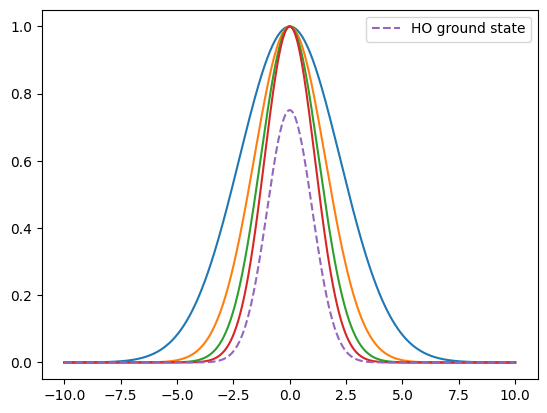

In [41]:
x = np.linspace(-10, 10, 10000)

for n in range(4):
    plt.plot(x, basis_functions(x, n))

plt.plot(x, psi0(x), '--', label='HO ground state')
plt.legend()

### Test for numerical accuracy

In [31]:
x = np.linspace(-10, 10, 10000)
dx=x[1]-x[0]

#Check normalization, should be 1
norm = np.trapz(psi0(x)**2, x=x)
print(norm)

#Check ground energy 1/2 hbar omega = 1/2 (because h=1 and omega=1 because k=1, mu=1)

Hii = np.trapz(psi0(x) *  KE(psi0(x), dx) + psi0(x) * PE(psi0(x), x) , x=x)
print(Hii)

1.0
0.49999949990084436


### Solve eigenvalue problem

In [34]:
# Define the number of basis functions and the range of x
num_basis_functions = 2

# Compute the overlap matrix and Hamiltonian matrix
overlap_matrix = np.zeros((num_basis_functions, num_basis_functions))
hamiltonian_matrix = np.zeros((num_basis_functions, num_basis_functions))

for i in range(num_basis_functions):
    for j in range(num_basis_functions):

        fi, fj = basis_functions(x, i), basis_functions(x, j)

        overlap_matrix[i, j]     = np.trapz(fi * fj, x=x)

        hamiltonian_matrix[i, j] = np.trapz(fi * KE(fj, dx) + fi * PE(fj, x), x=x)

# Diagonalize the matrices to find eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(hamiltonian_matrix, overlap_matrix)

# Find the ground-state energy (lowest eigenvalue) and corresponding eigenfunction
ground_state_energy = eigenvalues[0]
ground_state_wavefunction = eigenvectors[:, 0]

print(f"Ground-State Energy: {ground_state_energy}")
print(f"Ground-State Wavefunction Coefficients: {ground_state_wavefunction}")

Ground-State Energy: 0.6102313319882992
Ground-State Wavefunction Coefficients: [ 0.33492713 -0.97644553]


### visualize Eigenfunctions and eigenvalues

Text(0.5, 1.0, 'Energy levels')

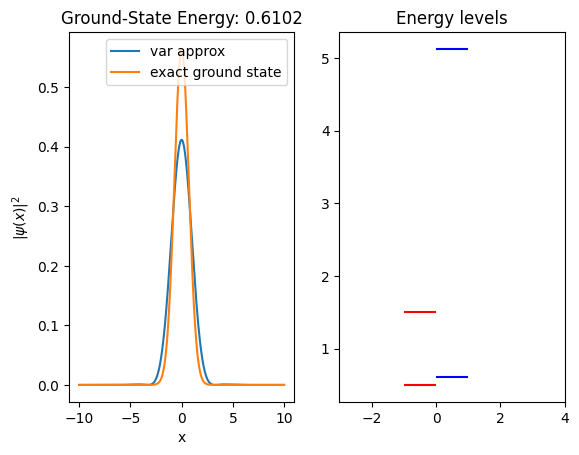

In [35]:
psi = 0 # trial function
k   = 0 # eigenvector 

fig, (ax1, ax2) = plt.subplots(ncols=2)
for i in range(num_basis_functions):

    psi += eigenvectors[:, k][i] * basis_functions(x, i)

ax1.plot(x, psi**2, label='var approx')
ax1.plot(x, psi0(x)**2, label='exact ground state')
ax1.legend()
ax1.set_title(f"Ground-State Energy: {ground_state_energy:.4f}")
ax1.set_xlabel('x')
ax1.set_ylabel('$|\psi(x)|^2$')


for n, level in enumerate(eigenvalues):

    plt.hlines(E0(n), -1, -0.001, colors='red', linestyles='-', label=f'Level {n+1}')
    plt.hlines(level, 0, 1, colors='blue', linestyles='solid', label=f'Level {n+1}')

ax2.set_xlim(-3, 4)
ax2.set_title('Energy levels')